# 1) 테이블계산식
원데이터를 집계한 값을 가지고 실행하는 것  

## 1-1) 시각화의 세부수준
국가별 가격 변동 비율 차이를 구할 때 우리는 Dollar Price의 합계를 구하고, 그 합계 값으로 '구성비율'이라는 테이블계산식을 통해 변동 비율을 계산하였다.  
** 참고로 Dollar Price의 합계를 구한 기준은 연도(Date)와 국가명(Name)  

여기서 집계의 기준은 **시각화의 세부 수준**에 따라 결정된다.  

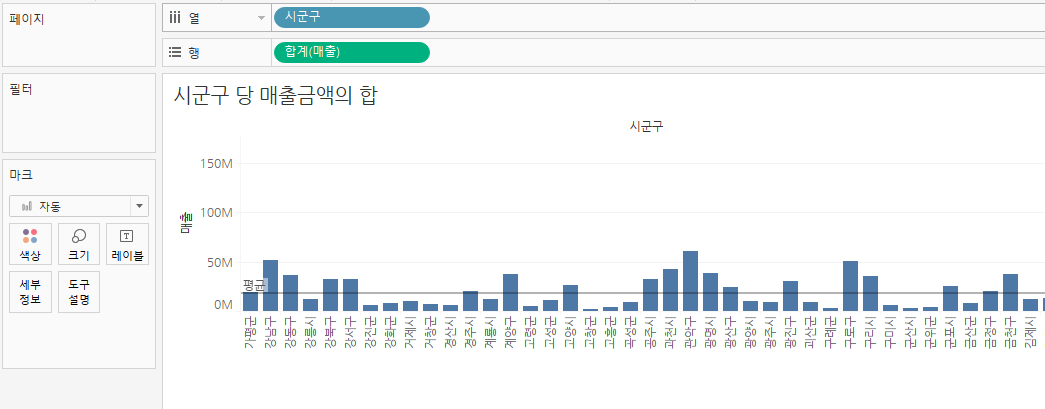 

* 매출을 더블클릭하면 전체 데이터의 총 매출의 합계가 표현된다. (막대기 하나) 그 상태에서 시군구를 열 선반에 올리면, 매출이 시군구 수준으로 집계되는 것을 볼 수 있다.  
* 이처럼 시각화에 추가되는 차원에 따라 집계의 '기준'이 변경되는데, 이 기준을 '시각화의 세부 수준' or '뷰의 수준'이라고 한다.

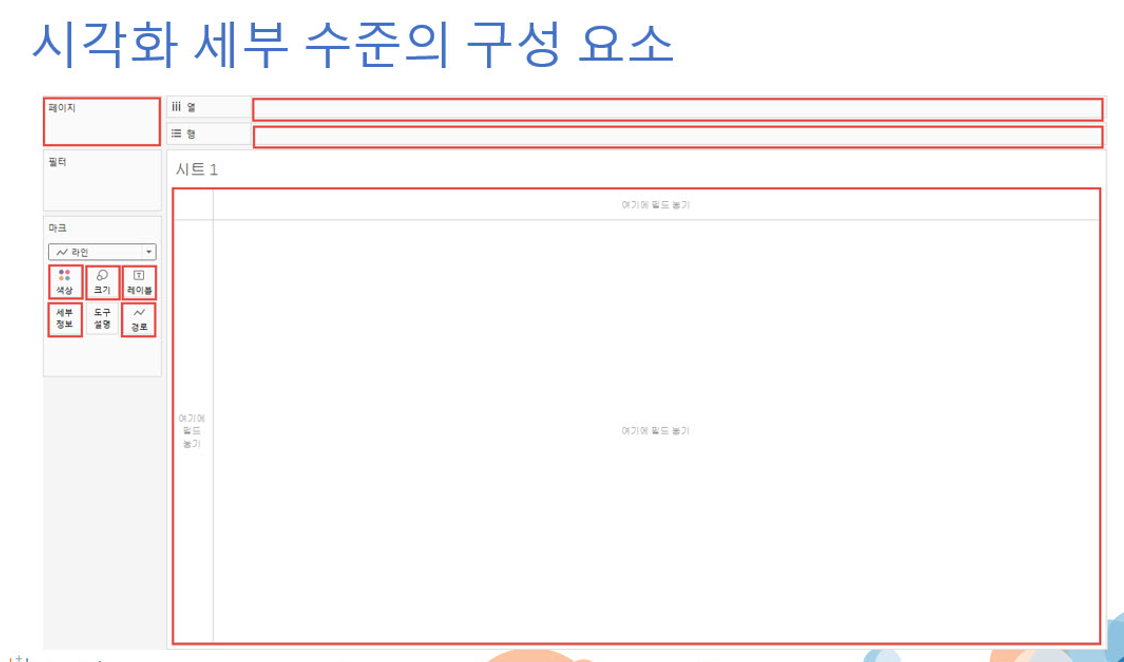

빨간색들이 모두 시각화의 세부수준을 결정짓는다. (= 모두 차원이라고 볼 수 있다.)  

이와 같이 측정값은 세부수준에 따라 집계가 되기 때문에, 재계산이 되는 범위와 방향에 따라 값이 달라지기 때문에 신중하게 범위와 방향을 잡아야한다.  

## 1-2) 실습: 테이블 계산식 - 차이
주식 데이터로 전일 대비 종가가 상승/하락했는지 나타내는 차트를 그려본다.  
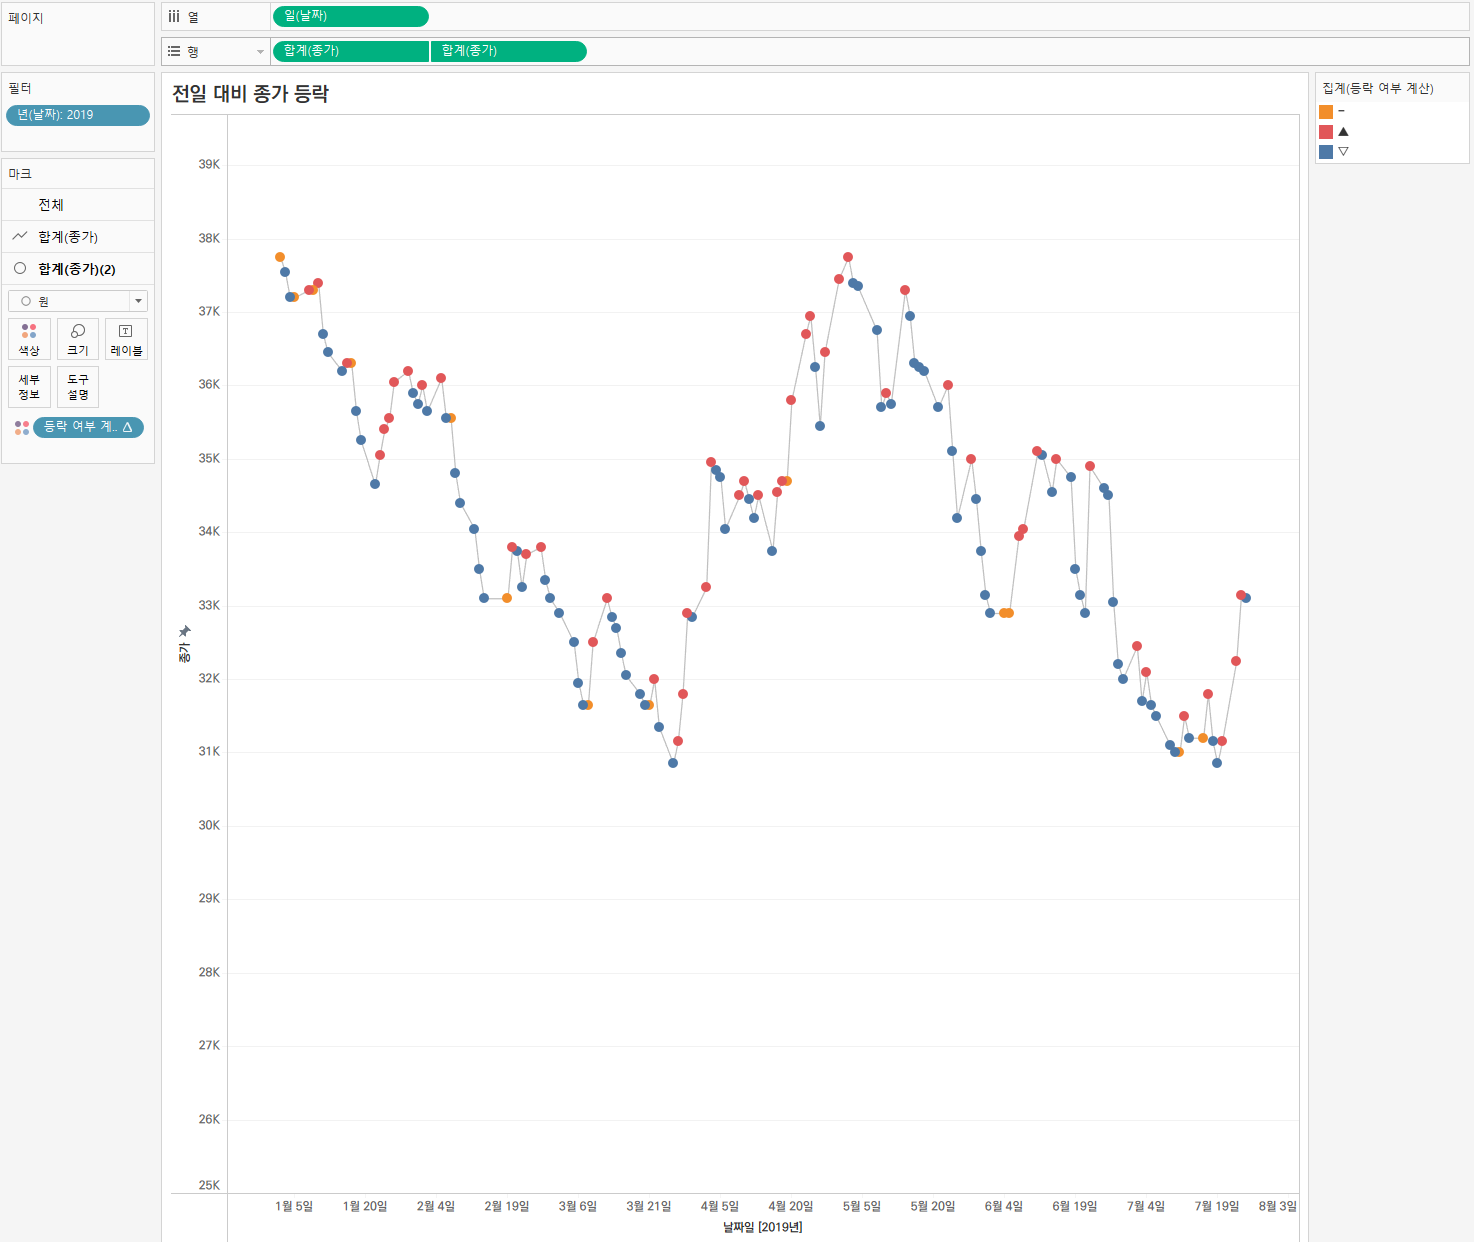  

이중축은 두번 째 그래프에서 우클릭 후 이중축임.  
URL 동기화하는 법 -> 필요한 변수(ex. 코드명)을 원마크의 세부정보에 추가, 작업추가에서 URL 후 주소=<코드명> 식으로 사용하면 된다.  



## 1-3) 실습: 테이블 계산식 - 구성비율 

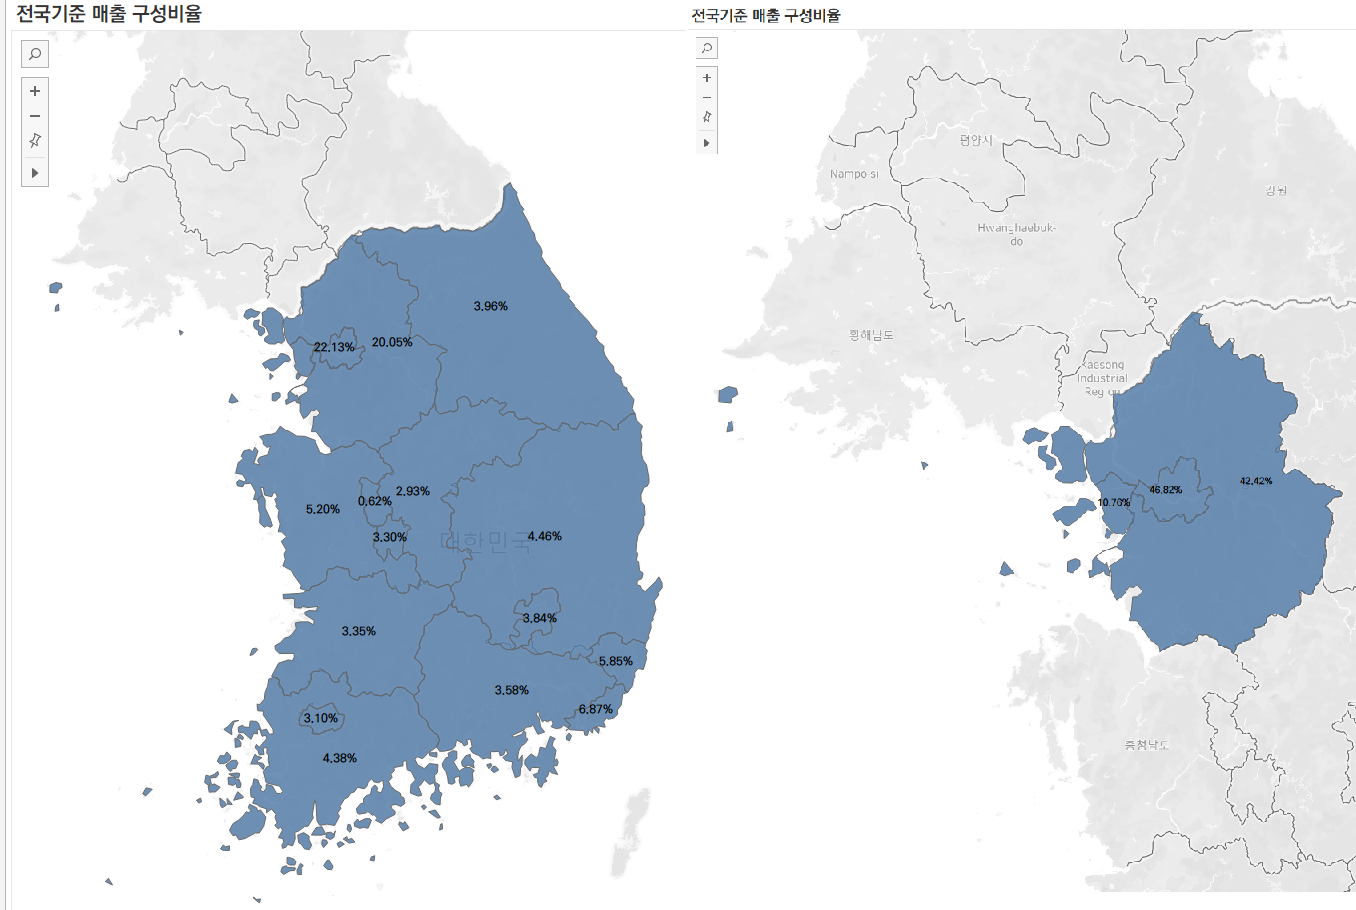 

필터적용 전은 서울매출합계 / 전국매출합계(전국에서 22%),  
필터적용 후는 서울매출합계 / 수도권매출합계(수도권 내 서울이 46%)로 계산되어 구성비율의 수치가 달라지게 됐다.  

그렇다면, 필터를 적용해도 수치가 안바뀌게 하려면 어떻게해야할까? **LoD를 이용하면 된다.**

--- 
---

# 2) 세부 수준 계산식 (LoD)
화면상의 세부 수준(LoD)와 관계 없이 계산이 필요한 경우 사용  
  
**{[INCLUDE|EXCLUDE|FIXED][차원]...:집계식([측정값)}**  

1) 고객 당, 주문 당 등 '~당' 계산이 필요한 경우  
2) 집계를 다시 집계해야 하는 상황  
3) 집계 결과를 기준으로 구간을 나눠야 하는 경우  
4) 뷰에서 보고 있는 수준 보다 아래 또는 위 수준에서 계산 결과를 만들어야 하는 경우  


## 2-1) 지역별/전국구 구성비 함께보기  
1-3 실습에서 시각화 세부수준은 '국가' 와 '시도' 이다. 이 뷰에서 매출의 합계 값을 구한다면, 가장 낮은 시각화 세부 수준인 '시도' 수준으로 매출합계 값이 구해지게 된다.  
  
근데 전국 기준 매출 구성 비율을 구하려면, 시도 매출의 합계를 전국 매출의 합계로 나눠야했다.  
  
근데 현재 뷰인 시도매출에서 전국기준을 구할 수 있는가? 이렇게 안될 때 사용하는 것이 LoD다.  

{FIXED [국가] ; SUM([매출])} -> 국가기준 매출 (테이블 계산식을 통해 변수만들기)  

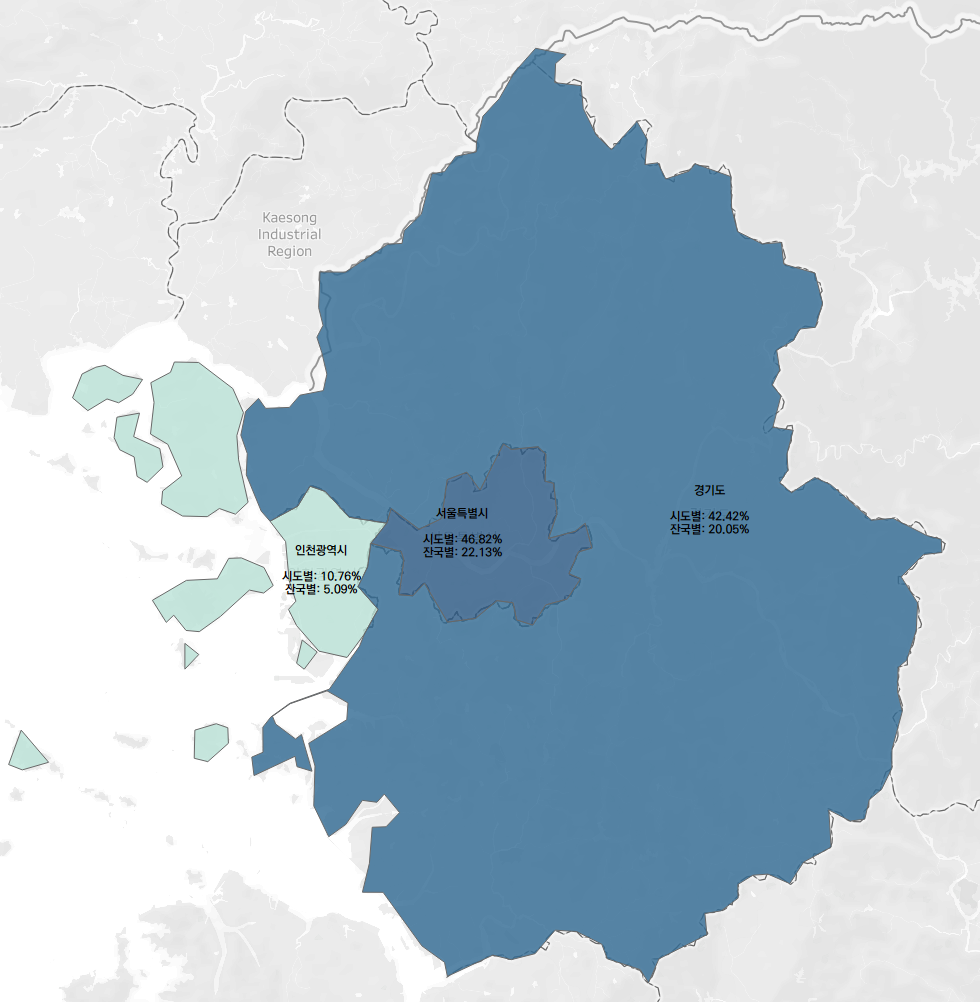

## 2-2) 과거 구매고객의 매출 기여도
연도별 매출에서 각 고객들의 주문 일자의 최소값을 찾으면, 최초에 구매한 년도에 따라 년도별 매출 기여도를 찾아볼 것이다.  

{FIXED [고객번호] ; MIN([주문 일자])} -> 고객별 최초구매일 

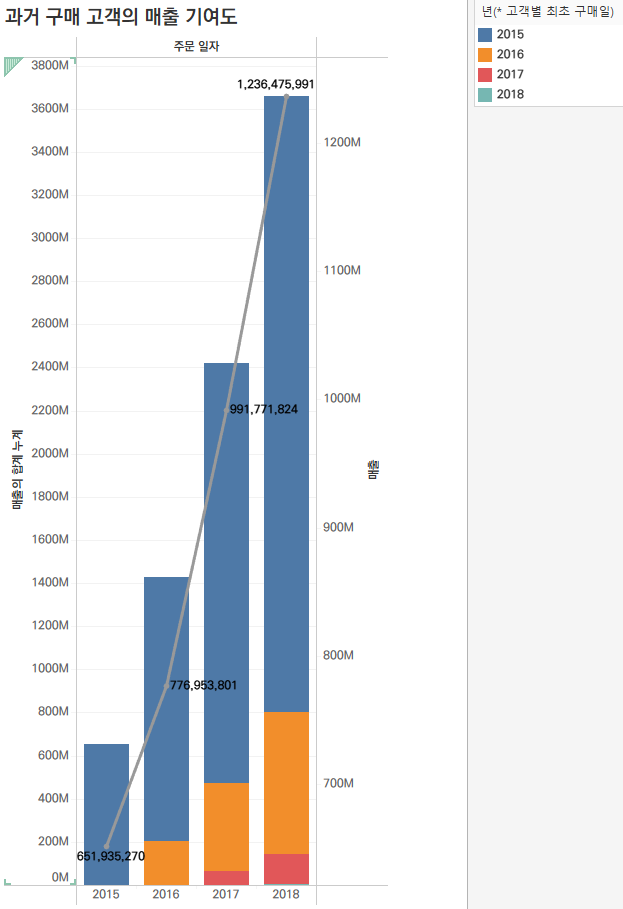

## 2-3) 고객 당 재구매 시점까지 경과기간
고객별 최초구매일이 있으니, 이들의 재구매 시점을 어떻게 만들까?  
제품 구매일자가 최초구매일보다 크면 재구매일자를 구하고 그 중 가장 작은 값이 두번째 재구매일이라고 볼 수 있다. 이는 식으로 나타면 다음과 같다.  

{FIXED [고객번호] : 
MIN(IIF([* 고객별 최초 구매일] < [주문 일자], [주문 일자], NULL)
)}  

이를통해 구한 최초 재구매일을 구한 후, DATEDIFF를 이용하여 분기차이를 코호트로 나타내보자.  

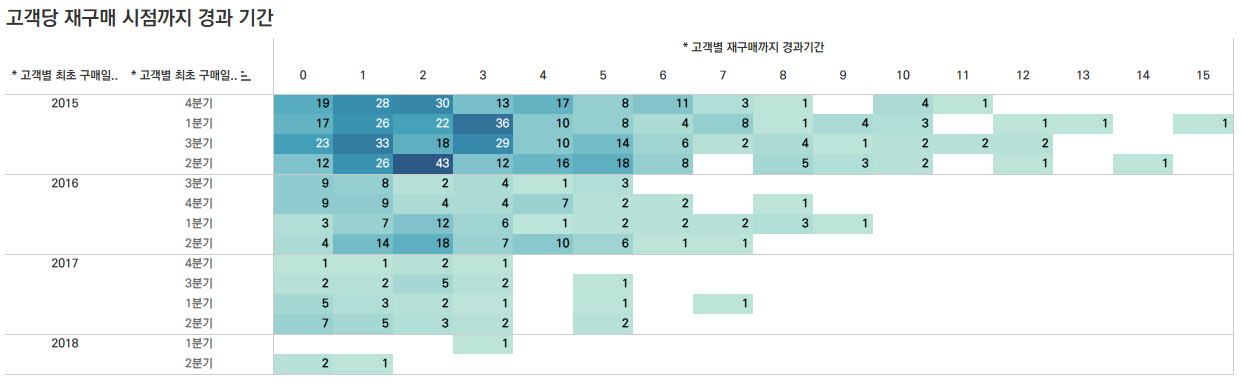